In [2]:
import pandas as pd
import numpy as np

In [3]:
books = pd.read_parquet("books_data/books.parquet")
users = pd.read_parquet("books_data/users.parquet")
ratings = pd.read_parquet("books_data/ratings.parquet")

In [10]:
print(f"Num books: {len(books.index)}")
print(f"Num users: {len(users.index)}")
print(f"Num ratings: {len(ratings.index)}")

Num books: 138700
Num users: 92107
Num ratings: 1031175


# Data Cleaning

In [1]:
# books['Category'] = [l[2:-2] for l in books['Category']]
# books.drop(index=books[books['Category'] == '9'].index, inplace=True) #remove 9 in category

In [4]:
# books.drop(columns=['category_clean'], axis=1, inplace=True)
# books.Category[:1].values.item(0)[2:-2]
# books.year_of_publication = books.year_of_publication.astype('int32')
users.head()

,user_id,location,age,city,state,country
0,2,"stockton, california, usa",18.0000,stockton,california,usa
1,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada
2,11400,"ottawa, ontario, canada",49.0000,ottawa,ontario,canada
3,11676,"n/a, n/a, n/a",34.7439,None,None,None
4,41385,"sudbury, ontario, canada",34.7439,sudbury,ontario,canada


In [6]:
min_user_rating_times = ratings.groupby('user_id').min()['rating_timestamp']

In [7]:
min_user_rating_times = min_user_rating_times.to_frame().reset_index()

In [8]:
min_user_rating_times.rating_timestamp.rename("signup_date")

0       2022-08-04 16:03:16.862
1       2020-08-04 07:22:59.858
2       2020-04-01 12:05:52.654
3       2020-07-04 18:18:19.970
4       2020-07-23 04:19:17.666
                  ...          
92102   2020-03-06 11:36:34.759
92103   2020-05-11 14:32:33.494
92104   2020-01-03 15:06:18.502
92105   2021-03-15 17:04:45.672
92106   2020-03-19 06:20:28.966
Name: signup_date, Length: 92107, dtype: datetime64[ns]

In [9]:
# min_user_rating_times = min_user_rating_times.rename(columns={"rating_timestamp": "signup_date"})
min_user_rating_times

,user_id,rating_timestamp
0,2,2022-08-04 16:03:16.862
1,8,2020-08-04 07:22:59.858
2,9,2020-04-01 12:05:52.654
3,10,2020-07-04 18:18:19.970
4,12,2020-07-23 04:19:17.666
...,...,...
92102,278846,2020-03-06 11:36:34.759
92103,278849,2020-05-11 14:32:33.494
92104,278851,2020-01-03 15:06:18.502
92105,278852,2021-03-15 17:04:45.672


In [11]:
# books[books.year_of_publication <= 1678]
# books.drop(index=books[books['year_of_publication'] <= 1678].index, inplace=True)
def random_dates(start, end, n, unit='D', seed=None):
    ndays = (end - start).days + 1
    return pd.to_timedelta(np.random.rand(n) * ndays, unit=unit) + start

start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2023-01-01')
rating_dates = random_dates(start, end, n=1031175)
# ratings['rating_timestamp'] = rating_dates
users['signup_date'] = rating_dates
users

,user_id,location,age,city,state,country,signup_date
0,2,"stockton, california, usa",18.0000,stockton,california,usa,2021-09-12 06:14:27.197750400
1,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-03-28 08:33:46.118505600
2,11400,"ottawa, ontario, canada",49.0000,ottawa,ontario,canada,2021-04-28 17:26:12.129878400
3,11676,"n/a, n/a, n/a",34.7439,None,None,None,2020-05-26 23:27:34.657603200
4,41385,"sudbury, ontario, canada",34.7439,sudbury,ontario,canada,2022-09-12 22:51:16.743340800
...,...,...,...,...,...,...,...
1031170,278851,"dallas, texas, usa",33.0000,dallas,texas,usa,2020-01-15 00:52:00.962140800
1031171,278851,"dallas, texas, usa",33.0000,dallas,texas,usa,2021-05-17 03:49:13.677052800
1031172,278851,"dallas, texas, usa",33.0000,dallas,texas,usa,2022-12-08 17:21:07.617916800
1031173,278851,"dallas, texas, usa",33.0000,dallas,texas,usa,2022-07-19 22:00:24.133795200


In [13]:
merged = users.merge(min_user_rating_times, on="user_id")

In [14]:
merged['clean_signup_date'] = merged[['signup_date', 'rating_timestamp']].min(axis=1)

In [19]:
merged['clean_signup_date']

2020-01-01 01:29:42.993    11141
2020-01-01 00:45:44.257     6456
2020-01-01 00:04:25.161     5814
2020-01-01 00:58:52.487     5779
2020-01-01 07:00:45.819     5644
                           ...  
2021-04-27 09:18:41.137        1
2020-10-21 17:35:06.109        1
2020-08-07 08:09:08.231        1
2021-01-05 18:25:04.158        1
2022-01-04 08:51:21.480        1
Name: clean_signup_date, Length: 123345, dtype: int64

In [20]:
merged.drop(columns=['rating_timestamp', 'signup_date'], inplace=True)

In [22]:
merged = merged.rename(columns={"clean_signup_date": "signup_date"})

In [23]:
merged

,user_id,location,age,city,state,country,signup_date
0,2,"stockton, california, usa",18.0000,stockton,california,usa,2021-09-12 06:14:27.197750400
1,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-03-28 08:33:46.118505600
2,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-08-04 07:22:59.858000000
3,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-02-10 07:22:09.616627200
4,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-08-04 07:22:59.858000000
...,...,...,...,...,...,...,...
1031170,278636,"irvington, alabama, usa",34.7439,irvington,alabama,usa,2022-04-18 21:21:45.025516800
1031171,278659,"vancouver, washington, usa",33.0000,vancouver,washington,usa,2021-09-28 02:22:09.675494400
1031172,278713,"albuquerque, new mexico, usa",63.0000,albuquerque,new mexico,usa,2020-12-28 16:58:04.785312000
1031173,278714,"silverton, oregon, usa",34.7439,silverton,oregon,usa,2022-02-22 01:46:43.967481600


In [192]:
books['created_at'] = [pd.Timestamp(year, 1, 1, 12) for year in books['year_of_publication']] 

In [40]:
users = users.sort_values(by="signup_date", ascending=True)
users = users.drop_duplicates(subset=['user_id'], keep='first')
users = users.sort_values(by="user_id")

In [49]:
books = books.sort_values(by="created_at", ascending=True)
books = books.drop_duplicates(subset=['isbn'], keep='first')
books = books.sort_values(by="isbn")

In [56]:
# books[['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher', 'Summary', 'Language', 'Category']].to_parquet("books.parquet")
# users[['user_id', 'location', 'age', 'city', 'state', 'country']].to_parquet("users.parquet")

# books.to_parquet("books_data/books.parquet")
# ratings.to_parquet("books_data/ratings.parquet", coerce_timestamps ='ms', allow_truncated_timestamps=True)
# users.to_parquet("books_data/users.parquet", coerce_timestamps ='ms', allow_truncated_timestamps=True) # this takes random signup dates + mins with ratings

books[:100].to_csv("books_data/books_sample.csv")
users[:100].to_csv("books_data/users_sample.csv")
ratings[:100].to_csv("books_data/ratings_sample.csv")

# Explore data

In [51]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,created_at
948518,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon & Schuster,"Scientific principles, inventions, and chemica...",en,Technology & Engineering,1967-01-01 12:00:00
826650,0001055607,Cereus Blooms At Night,Shani Mootoo,1994,Fairmount Books Ltd Remainders,"When Mala, old and notoriously crazy, arrives ...",en,Adult child abuse victims,1994-01-01 12:00:00
908526,0001061127,CHESS FOR YOUNG BEGINNERS,William T. McLeod,1975,HarperCollins Publishers,A step by step guide to playing chess,en,Chess,1975-01-01 12:00:00
1025127,0001374362,When It's Time for Bed (Collins Baby & Toddler...,Nick Butterworth,1994,Collins,Shows baby and his animal friends preparing fo...,en,Animals,1994-01-01 12:00:00
935227,0001711253,The Big Honey Hunt,Stan Berenstein,1942,HarperCollins Publishers,Father Bear takes Small Bear on a honey hunt. ...,en,Bears,1942-01-01 12:00:00


In [176]:
books.Language.unique()

array(['en', 'de', 'fr', 'es', 'ca', 'it', 'da', 'nl', 'pt', 'gl', 'ro',
       'no', 'el', 'ms', 'la', 'ru', 'zh-CN', 'ga', 'pl', 'tl', 'th',
       'ja', 'cy', 'fa', 'eo', 'gd', 'hi', 'vi', 'ar', 'zh-TW', 'ko'],
      dtype=object)

In [47]:
users.head()

,user_id,location,age,city,state,country,signup_date
0,2,"stockton, california, usa",18.0000,stockton,california,usa,2021-09-12 06:14:27.197
3,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-02-10 07:22:09.616
32775,9,"germantown, tennessee, usa",34.7439,germantown,tennessee,usa,2020-04-01 12:05:52.654
193428,10,"albacete, wisconsin, spain",26.0000,albacete,wisconsin,spain,2020-07-04 18:18:19.970
196326,12,"fort bragg, california, usa",34.7439,fort bragg,california,usa,2020-07-23 04:19:17.666


In [46]:
users.groupby('user_id').count().sort_values(by="age", ascending=False)

,location,age,city,state,country,signup_date
user_id,,,,,,
2,1,1,1,1,1,1
186657,1,1,1,1,1,1
186723,1,1,1,1,1,1
186719,1,1,1,1,1,1
186716,1,1,1,1,1,1
...,...,...,...,...,...,...
93044,1,1,1,1,1,1
93043,1,1,1,1,1,1
93041,1,1,1,0,1,1


In [41]:
users[users['user_id'] == 8]

,user_id,location,age,city,state,country,signup_date
3,8,"timmins, ontario, canada",34.7439,timmins,ontario,canada,2020-02-10 07:22:09.616


In [33]:
ratings[ratings['user_id'] == 8]

,user_id,isbn,rating,rating_timestamp
1,8,0002005018,5,2020-08-15 16:00:36.000
15,8,0060973129,0,2022-03-26 10:25:04.125
18,8,0374157065,0,2022-01-21 13:10:34.477
29,8,0393045218,0,2021-12-29 12:19:41.604
30,8,0399135782,0,2020-08-04 12:31:50.798
63,8,0425176428,0,2022-12-28 04:19:48.895
68,8,0671870432,0,2021-01-08 18:51:55.942
71,8,0679425608,0,2021-07-15 02:44:56.907
72,8,074322678X,5,2022-07-01 03:02:06.010
73,8,0771074670,0,2022-02-13 12:58:11.005


In [52]:
books.Category.nunique()

6447

In [53]:
books.Category.value_counts(normalize=True).sort_values(ascending=False)[:50]

Fiction                          0.383504
Juvenile Fiction                 0.074160
Biography & Autobiography        0.038789
Religion                         0.025415
History                          0.025299
Juvenile Nonfiction              0.021132
Social Science                   0.016474
Business & Economics             0.015162
Body, Mind & Spirit              0.012307
Health & Fitness                 0.012206
Family & Relationships           0.012098
Cooking                          0.012033
Humor                            0.011464
Computers                        0.010216
Psychology                       0.008421
Self-Help                        0.008025
Science                          0.007823
Travel                           0.007743
Poetry                           0.007015
Literary Criticism               0.006770
Art                              0.006460
Sports & Recreation              0.006035
Philosophy                       0.005883
Nature                           0

In [54]:
books.Category.value_counts(normalize=True).sort_values(ascending=False)[:100].sum()

0.8645061283345348

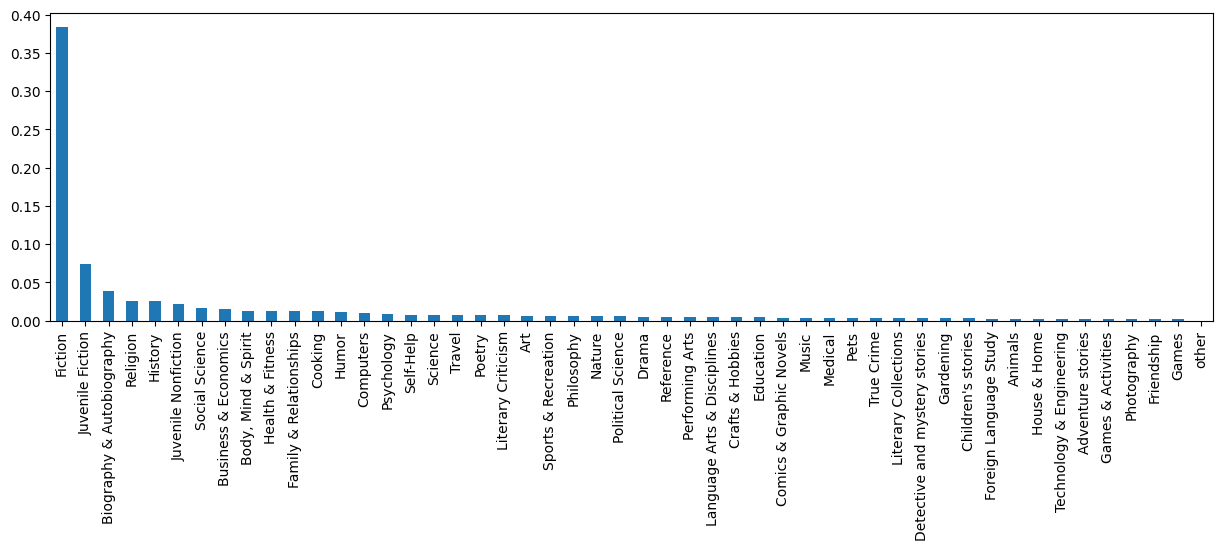

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

prob = books.Category.value_counts(normalize=True)
threshold = 0.001471
mask = prob > threshold
# Filter for values above threshold
prob = prob.loc[mask]
# Add other bucket
tail_prob = prob.loc[~mask].sum()
prob['other'] = tail_prob
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
prob.plot(kind='bar')
plt.show()